### Importing warnings and libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

### Importing dataset

In [4]:
app_data = pd.read_csv('application_data.csv')

In [5]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_data.shape

(307511, 122)

In [7]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [8]:
preapp_data = pd.read_csv('previous_application.csv')

In [9]:
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
preapp_data.shape

(1670214, 37)

In [11]:
# inspect data columns and data
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [12]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [13]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
preapp_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [15]:
preapp_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [16]:
preapp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Data Cleaning

#### null values of application_data

In [17]:
round(100*(app_data.isnull().sum()/len(app_data)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [18]:
# there are many columns which have null values greater than 40%, lets filter them.
app_data_null = pd.DataFrame(round(100*(app_data.isnull().sum()/len(app_data)),2)).reset_index()
app_data_null.columns = ['Column Name', 'Null Values Percentage']
app_data_null_above40 = app_data_null[app_data_null['Null Values Percentage']>=40]
app_data_null_above40

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.99
41,EXT_SOURCE_1,56.38
44,APARTMENTS_AVG,50.75
45,BASEMENTAREA_AVG,58.52
46,YEARS_BEGINEXPLUATATION_AVG,48.78
47,YEARS_BUILD_AVG,66.50
48,COMMONAREA_AVG,69.87
49,ELEVATORS_AVG,53.30
50,ENTRANCES_AVG,50.35
51,FLOORSMAX_AVG,49.76


In [19]:
app_data_null_above40.shape

(49, 2)

#### null values of previous_application

In [20]:
round(100*(preapp_data.isnull().sum()/len(preapp_data)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [21]:
preapp_data_null = pd.DataFrame(round(100*(preapp_data.isnull().sum()/len(preapp_data)),2)).reset_index()
preapp_data_null.columns = ['Column Name', 'Null Values Percentage']
preapp_data_null_above40 = preapp_data_null[preapp_data_null['Null Values Percentage']>=40]
preapp_data_null_above40

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.64
12,RATE_DOWN_PAYMENT,53.64
13,RATE_INTEREST_PRIMARY,99.64
14,RATE_INTEREST_PRIVILEGED,99.64
20,NAME_TYPE_SUITE,49.12
31,DAYS_FIRST_DRAWING,40.30
32,DAYS_FIRST_DUE,40.30
33,DAYS_LAST_DUE_1ST_VERSION,40.30
34,DAYS_LAST_DUE,40.30
35,DAYS_TERMINATION,40.30


In [22]:
preapp_data_null_above40.shape

(11, 2)

#### Lets create a list of unwanted columns for both data sets and store columns with null values>=40%

In [23]:
unwanted_app_data = app_data_null_above40['Column Name'].tolist()
unwanted_preapp_data = preapp_data_null_above40['Column Name'].tolist()

#### Lets analyze other columns in the application_data which have null values less than 40%

In [24]:
# lets check relation between target variable and document flag variables
doc_col = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [25]:
doc_flag_df = app_data[doc_col+['TARGET']]

In [26]:
#temporarily changing target variable from 1,0 to categories "With Pay difficulty","All Other" for better analysis
doc_flag_df["TARGET"] = doc_flag_df["TARGET"].replace({1:"With Pay difficulty",0:"All Other"})

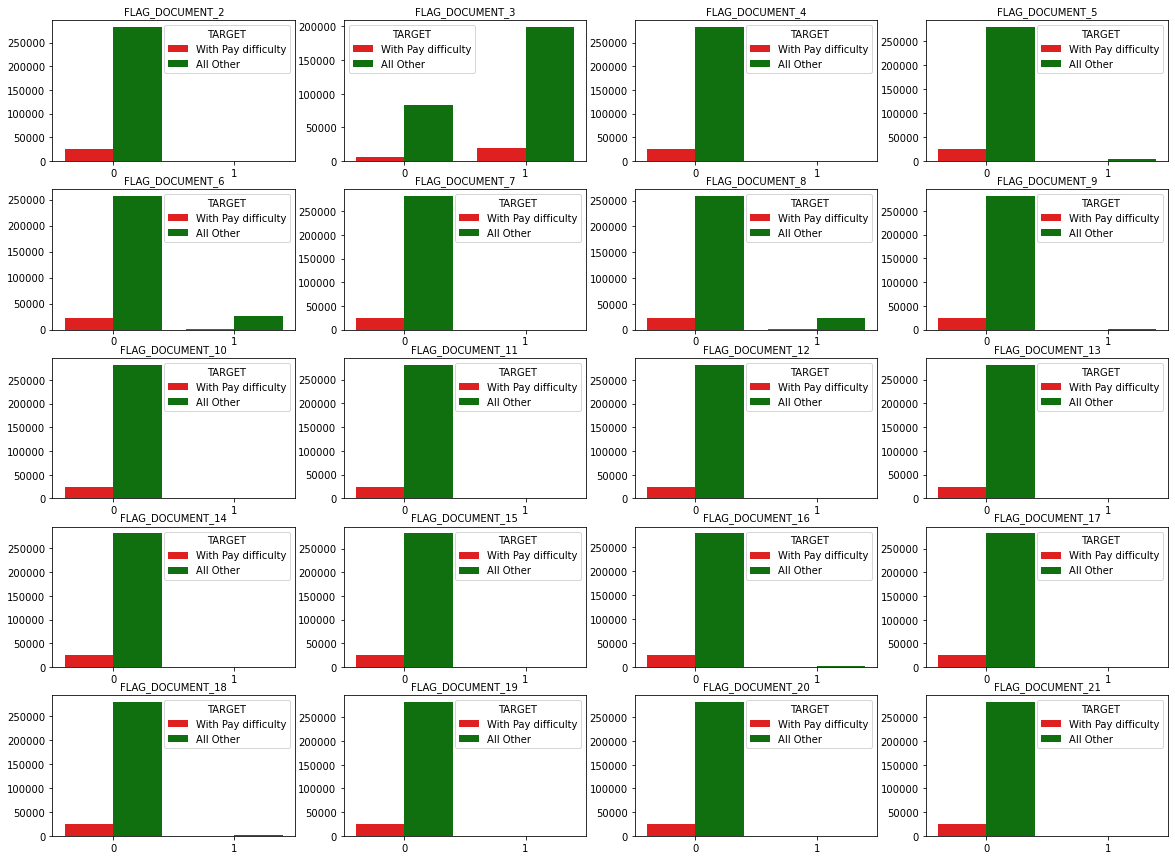

In [27]:
#lets make a subplot to check relation between all document_flag columns and target variable
fig = plt.figure(figsize=(20,15))
for i,j in itertools.zip_longest(doc_col,range(len(doc_col))):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(doc_flag_df[i],hue=doc_flag_df["TARGET"],palette=["r","g"])
    plt.yticks()
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i,fontsize=10)

* From the above visualization, we can clearly see that large portion of customers have not submitted any kind of documents except for the **FLAG_DOCUMENT_3**. Lets move all other document flag columns to unwanted coimuns expect for the **FLAG_DOCUMENT_3**

In [28]:
doc_col.remove('FLAG_DOCUMENT_3')

In [29]:
unwanted_app_data = unwanted_app_data + doc_col
len(unwanted_app_data)

68

In [30]:
app_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# lets check relation between target variable and EXT_SOURCE,contact detail variables
app_data[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,0.083037,0.262949,0.139376,1,1,0,1,1,0
1,0.311267,0.622246,NaN,1,1,0,1,1,0
2,NaN,0.555912,0.729567,1,1,1,1,1,0
3,NaN,0.650442,NaN,1,1,0,1,0,0
4,NaN,0.322738,NaN,1,1,0,1,0,0


In [32]:
Source_contact_cols = ['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [33]:
Source_contact_df = app_data[Source_contact_cols]

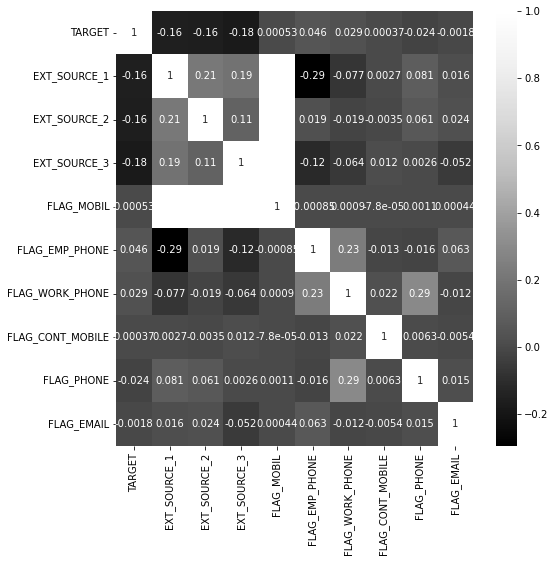

In [34]:
#lets check correlation between target variable and EXT_SOURCE,contact detail variables
plt.figure(figsize=[8,8])
sns.heatmap(Source_contact_df.corr(),annot = True,cmap ="Greys_r")
plt.show()

* From the above visualization, we can clearly see that there is no correlation between ***TARGET*** and ***EXT_SOURCE***, ***Contact Details***. So lets move them to unwanted columns.

In [35]:
Source_contact_cols.remove('TARGET')
Source_contact_cols.remove('EXT_SOURCE_1')
Source_contact_cols

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [36]:
unwanted_app_data=unwanted_app_data+Source_contact_cols
len(unwanted_app_data)

76

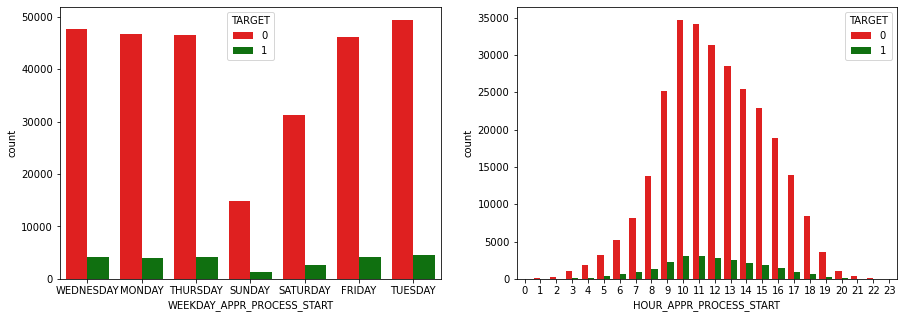

In [37]:
#lets check relation between target variable and WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(app_data['WEEKDAY_APPR_PROCESS_START'],hue=app_data['TARGET'],palette=['r','g'])
plt.subplot(1,2,2)
sns.countplot(app_data['HOUR_APPR_PROCESS_START'],hue=app_data['TARGET'],palette=['r','g'])

plt.show()

##### We can clearly observe that values for both the above columns are evenly distributed in working weekdays and working week hours,So these can be moved to unwanted columns.

In [38]:
unwanted_app_data = unwanted_app_data+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
len(unwanted_app_data)

78

In [39]:
wanted_app_data = set(app_data.columns.tolist())-set(unwanted_app_data)

In [40]:
wanted_app_data

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REG

In [41]:
app_data[wanted_app_data].head()

,FLAG_OWN_REALTY,REG_REGION_NOT_WORK_REGION,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_EMPLOYED,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR,DEF_60_CNT_SOCIAL_CIRCLE,TARGET,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,ORGANIZATION_TYPE,NAME_TYPE_SUITE,AMT_GOODS_PRICE,CNT_CHILDREN,NAME_CONTRACT_TYPE,REG_REGION_NOT_LIVE_REGION,DAYS_BIRTH,DEF_30_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT,NAME_HOUSING_TYPE,AMT_CREDIT,AMT_REQ_CREDIT_BUREAU_MON,DAYS_ID_PUBLISH,NAME_FAMILY_STATUS,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_DAY,AMT_INCOME_TOTAL,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,NAME_EDUCATION_TYPE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_OWN_CAR,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,LIVE_REGION_NOT_WORK_REGION,CODE_GENDER,DAYS_REGISTRATION
0,Y,0,2.0,0.0,-637,0,1.0,100002,2.0,1,Laborers,2,0.018801,Business Entity Type 3,Unaccompanied,351000.0,0,Cash loans,0,-9461,2.0,2,House / apartment,406597.5,0.0,-2120,Single / not married,24700.5,0.0,202500.0,-1134.0,1,0.0,Secondary / secondary special,1.0,0.0,N,0,0,Working,2.0,0,M,-3648.0
1,N,0,1.0,0.0,-1188,0,0.0,100003,0.0,0,Core staff,1,0.003541,School,Family,1129500.0,0,Cash loans,0,-16765,0.0,1,House / apartment,1293502.5,0.0,-291,Married,35698.5,0.0,270000.0,-828.0,1,0.0,Higher education,2.0,0.0,N,0,0,State servant,1.0,0,F,-1186.0
2,Y,0,0.0,0.0,-225,0,0.0,100004,0.0,0,Laborers,2,0.010032,Government,Unaccompanied,135000.0,0,Revolving loans,0,-19046,0.0,2,House / apartment,135000.0,0.0,-2531,Single / not married,6750.0,0.0,67500.0,-815.0,0,0.0,Secondary / secondary special,1.0,0.0,Y,0,0,Working,0.0,0,M,-4260.0
3,Y,0,2.0,NaN,-3039,0,NaN,100006,0.0,0,Laborers,2,0.008019,Business Entity Type 3,Unaccompanied,297000.0,0,Cash loans,0,-19005,0.0,2,House / apartment,312682.5,NaN,-2437,Civil marriage,29686.5,NaN,135000.0,-617.0,1,NaN,Secondary / secondary special,2.0,NaN,N,0,0,Working,2.0,0,F,-9833.0
4,Y,0,0.0,0.0,-3038,1,0.0,100007,0.0,0,Core staff,2,0.028663,Religion,Unaccompanied,513000.0,0,Cash loans,0,-19932,0.0,2,House / apartment,513000.0,0.0,-3458,Single / not married,21865.5,0.0,121500.0,-1106.0,0,0.0,Secondary / secondary special,1.0,0.0,N,0,1,Working,0.0,0,M,-4311.0


* All other columns seems like important for further analysis,So lets delete the unwanted columns from the app_data that we saved in a seprate list.

In [42]:
app_data.drop(labels=unwanted_app_data,axis=1,inplace=True)

In [43]:
app_data.shape

(307511, 44)

In [44]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


* ### Lets inspect previous application data and delete unwanted columns.

In [45]:
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
preapp_data[['WEEKDAY_APPR_PROCESS_START']].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY                       255118
WEDNESDAY                     255010
MONDAY                        253557
FRIDAY                        252048
THURSDAY                      249099
SATURDAY                      240631
SUNDAY                        164751
dtype: int64

In [47]:
# WEEKDAY_APPR_PROCESS_START is almost evenly distributed, So we can proceed to move this field to unwanted columns
unwanted_preapp_data=unwanted_preapp_data + ['WEEKDAY_APPR_PROCESS_START']
unwanted_preapp_data

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'WEEKDAY_APPR_PROCESS_START']

In [48]:
preapp_data[['HOUR_APPR_PROCESS_START']].value_counts()

HOUR_APPR_PROCESS_START
11                         192728
12                         185980
10                         181690
13                         172256
14                         157711
15                         142965
9                          127002
16                         121361
17                          95064
8                           73085
18                          64156
7                           45646
19                          34089
6                           25759
5                           15392
20                          14535
4                            9319
3                            5035
21                           4082
2                            1116
22                            720
1                             212
23                            202
0                             109
dtype: int64

In [49]:
# HOUR_APPR_PROCESS_START is almost evenly distributed into working hours, So we can proceed to move this field to unwanted columns
unwanted_preapp_data=unwanted_preapp_data + ['HOUR_APPR_PROCESS_START']
unwanted_preapp_data

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START']

In [50]:
preapp_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [51]:
# FLAG_LAST_APPL_PER_CONTRACT has 99% values as yes. This will not help to get any insights, So we can proceed to move this field to unwanted columns
unwanted_preapp_data=unwanted_preapp_data + ['FLAG_LAST_APPL_PER_CONTRACT']
unwanted_preapp_data

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT']

In [52]:
preapp_data['NFLAG_LAST_APPL_IN_DAY'].value_counts(normalize=True)

1    0.996468
0    0.003532
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [53]:
# FLAG_LAST_APPL_PER_CONTRACT has 99% values as 1. This will not help to get any insights, So we can proceed to move this field to unwanted columns
unwanted_preapp_data=unwanted_preapp_data + ['NFLAG_LAST_APPL_IN_DAY']
unwanted_preapp_data

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [54]:
len(unwanted_preapp_data)

15

* All other columns seems like important for further analysis,So lets delete the unwanted columns from the app_data that we saved in a seprate list.

In [55]:
preapp_data.drop(labels=unwanted_preapp_data,axis=1,inplace=True)

In [56]:
preapp_data.shape

(1670214, 22)

In [57]:
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


## Data Standardization

* ***Application data*** - There are few values with negtive sign, lets standardise them

In [58]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
app_data['DAYS_BIRTH'] = abs(app_data['DAYS_BIRTH'])
app_data['DAYS_EMPLOYED'] = abs(app_data['DAYS_EMPLOYED'])
app_data['DAYS_REGISTRATION'] = abs(app_data['DAYS_REGISTRATION'])
app_data['DAYS_ID_PUBLISH'] = abs(app_data['DAYS_ID_PUBLISH'])
app_data['DAYS_LAST_PHONE_CHANGE'] = abs(app_data['DAYS_LAST_PHONE_CHANGE'])

* Lets create categorical bins for age,income,loan credit,years employed.

In [60]:
app_data['AGE'] = app_data['DAYS_BIRTH'] // 365

In [61]:
app_data['AGE_GROUP']=pd.cut(app_data['AGE'],labels=['0-20','20-30','30-40','40-50','50-60','60 above'],bins=[0,20,30,40,50,60,100])

In [62]:
app_data['AMT_INCOME_TOTAL']=app_data['AMT_INCOME_TOTAL']/100000

In [63]:
ranges = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],labels=ranges,bins=[0,1,2,3,4,5,6,7,8,9,10,11])

In [64]:
app_data['AMT_CREDIT']=app_data['AMT_CREDIT']/100000

In [65]:
app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],labels=ranges,bins=[0,1,2,3,4,5,6,7,8,9,10,100])

In [66]:
app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED'] // 365

In [67]:
years = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_data['EMPLOYMENT_YEAR']=pd.cut(app_data['YEARS_EMPLOYED'],labels=years,bins=[0,5,10,20,30,40,50,60,150],include_lowest=True)

In [68]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,200k-300k,400k-500k,1,0-5
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,0-100K,100K-200K,0,0-5
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN,52,50-60,100K-200K,300k-400k,8,5-10
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,50-60,100K-200K,500k-600k,8,5-10


In [69]:
app_data['AGE_GROUP'].value_counts(normalize=True)*100

30-40       27.028952
40-50       24.194582
50-60       22.054170
20-30       17.171743
60 above     9.550227
0-20         0.000325
Name: AGE_GROUP, dtype: float64

#### From above data we can see that more than 31% of loan applicants are above 50 age group and more than 80% of loan applicants are above 30 age group

In [70]:
app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

#### From above data we can see that more than 16% of loan applicants have taken loan amount above 1M

In [71]:
app_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

#### From above data we can see that more than 50% of loan applicants have annual income in the range of 100K-200k and more than 90% of loan applicants have income less than 300k

In [72]:
app_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         60.498063
5-10        22.203405
10-20       12.952482
20-30        3.335092
30-40        0.941552
40-50        0.069407
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

#### From above data we can see that more than 60% of loan applicants have work experiance between 0 to 5 years.

* ***Previous Application data*** - There are few values with negtive sign, lets standardise them

In [73]:
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [74]:
preapp_data.shape

(1670214, 22)

In [75]:
preapp_data['DAYS_DECISION'] = abs(preapp_data['DAYS_DECISION'])

* Lets create categorical bins for DAYS_DECISION as it is an important factor for our analysis

In [76]:
preapp_data['DAYS_DECISION'].max()

2922

In [77]:
days= ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000']

preapp_data['DAYS_DECISION_GROUP'] = pd.cut(preapp_data['DAYS_DECISION'],labels=days,bins=[0,500,1000,1500,2000,2500,3000])

In [78]:
preapp_data.DAYS_DECISION_GROUP.value_counts(normalize=True)*100

0-500        45.106316
500-1000     22.352046
1000-1500    11.480924
1500-2000     7.652373
2000-2500     7.394082
2500-3000     6.014259
Name: DAYS_DECISION_GROUP, dtype: float64

#### From above data we can see that more than 45% of loan applicants opted for next loan within 500 days of previous loan decision

## Imputing Null Values

* Application Data

In [79]:
# Calculating percentage of null values in application data
round(app_data.isnull().sum() / app_data.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
L

In [80]:
#lets impute OCCUPATION_TYPE which has higher percentage of null values with 31%
# Since it is categorical variable with high percentabe of null values, we can create a new category called 'unknown' and impute it
app_data['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 


In [81]:
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [82]:
## Lets impute median values for the no. of enquiries columns as mean will have float valeus.
no_of_enquiries = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in no_of_enquiries:
    app_data[col].fillna(app_data[col].median(),inplace = True)

In [83]:
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [84]:
# lets impute mode of NAME_TYPE_SUITE in its missing values.
app_data['NAME_TYPE_SUITE'].fillna((app_data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [85]:
round(app_data.isnull().sum() / app_data.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
L

In [86]:
#EMPLOYMENT_YEAR has 18% null values, lets see why is that.
app_data[app_data['EMPLOYMENT_YEAR'].isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR
8,100011,0,Cash loans,F,N,Y,0,1.125000,10.19610,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,Unknown,2.0,2,2,0,0,0,0,0,0,XNA,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,55,50-60,100K-200K,1M Above,1000,NaN
11,100015,0,Cash loans,F,N,Y,0,0.384192,1.48365,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417,365243,5246.0,2512,Unknown,2.0,2,2,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,2396.0,0,0.0,0.0,0.0,0.0,0.0,2.0,55,50-60,0-100K,100K-200K,1000,NaN
23,100027,0,Cash loans,F,N,Y,0,0.832500,2.39850,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,9012.0,3684,Unknown,2.0,3,3,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,795.0,0,0.0,0.0,0.0,0.0,0.0,3.0,68,60 above,0-100K,200k-300k,1000,NaN
38,100045,0,Cash loans,F,N,Y,0,0.990000,2.47275,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,23920,365243,9817.0,4969,Unknown,2.0,2,2,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,2.0,65,60 above,0-100K,200k-300k,1000,NaN
43,100050,0,Cash loans,F,N,Y,0,1.080000,7.46280,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,23548,365243,5745.0,4576,Unknown,1.0,2,2,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,491.0,1,0.0,0.0,0.0,0.0,0.0,3.0,64,60 above,100K-200K,700k-800k,1000,NaN


#### we can observe from above that where ever EMPLOYMENT_YEAR is null, YEARS_EMPLOYED is 1000. We know this is not possible. There is some discrepancy in the data. We can see that DAYS_EMPLOYED is greater than DAYS_BIRTH. Lets drop these rows as this will impact our further analysis

In [87]:
app_data = app_data[-app_data['EMPLOYMENT_YEAR'].isnull()]

In [88]:
app_data.shape

(252137, 50)

In [89]:
round(app_data.isnull().sum() / app_data.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.10
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION 

#### Remaining few columns in application data have very less number of null values which can be ignored.

* Imputing null values in Previous Application Data

In [90]:
round(preapp_data.isnull().sum() / preapp_data.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

In [91]:
# lets check for AMT_ANNUITY which has 22% null values
preapp_data['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

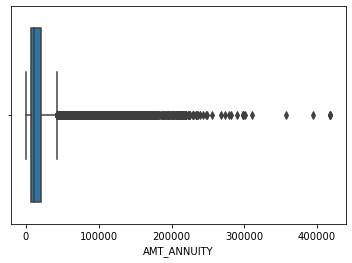

In [92]:
sns.boxplot(preapp_data['AMT_ANNUITY'])
plt.show()

In [93]:
# from the above we can see that most of the value lies between 0 to 50000, so median would be a better option here to impute.
preapp_data['AMT_ANNUITY'].fillna(preapp_data['AMT_ANNUITY'].median(),inplace = True)

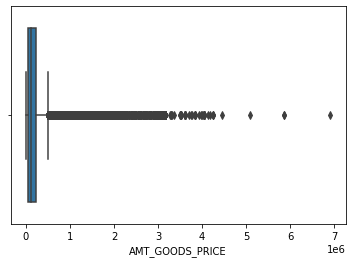

In [94]:
# lets check for AMT_GOODS_PRICE which has 23% null values
sns.boxplot(preapp_data['AMT_GOODS_PRICE'])
plt.show()

In [95]:
# from the above we can see that most of the value lies between 0 to 50000, so median would be a better option here to impute.
preapp_data['AMT_GOODS_PRICE'].fillna(preapp_data['AMT_GOODS_PRICE'].median(),inplace = True)

In [96]:
# Lets check for CNT_PAYMENT which has 22% null values. This field tells us the term of previous loan.
#lets check the pervious loan status for these null values
preapp_data[preapp_data['CNT_PAYMENT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [97]:
# we can observe that most of the applications were cancelled or refused or unused.
#So term would be 0 for these NAME_CONTRACT_STATUS
preapp_data['CNT_PAYMENT'].fillna(0,inplace = True)

In [98]:
round(preapp_data.isnull().sum() / preapp_data.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

#### We still have few null values and can be ingored as they are in very less percentage

# Lets have a look at outliers

In [99]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,200k-300k,400k-500k,1,0-5
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,0-100K,100K-200K,0,0-5
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,1.0,52,50-60,100K-200K,300k-400k,8,5-10
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,50-60,100K-200K,500k-600k,8,5-10


In [100]:
app_data_outlierscheck = app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']]

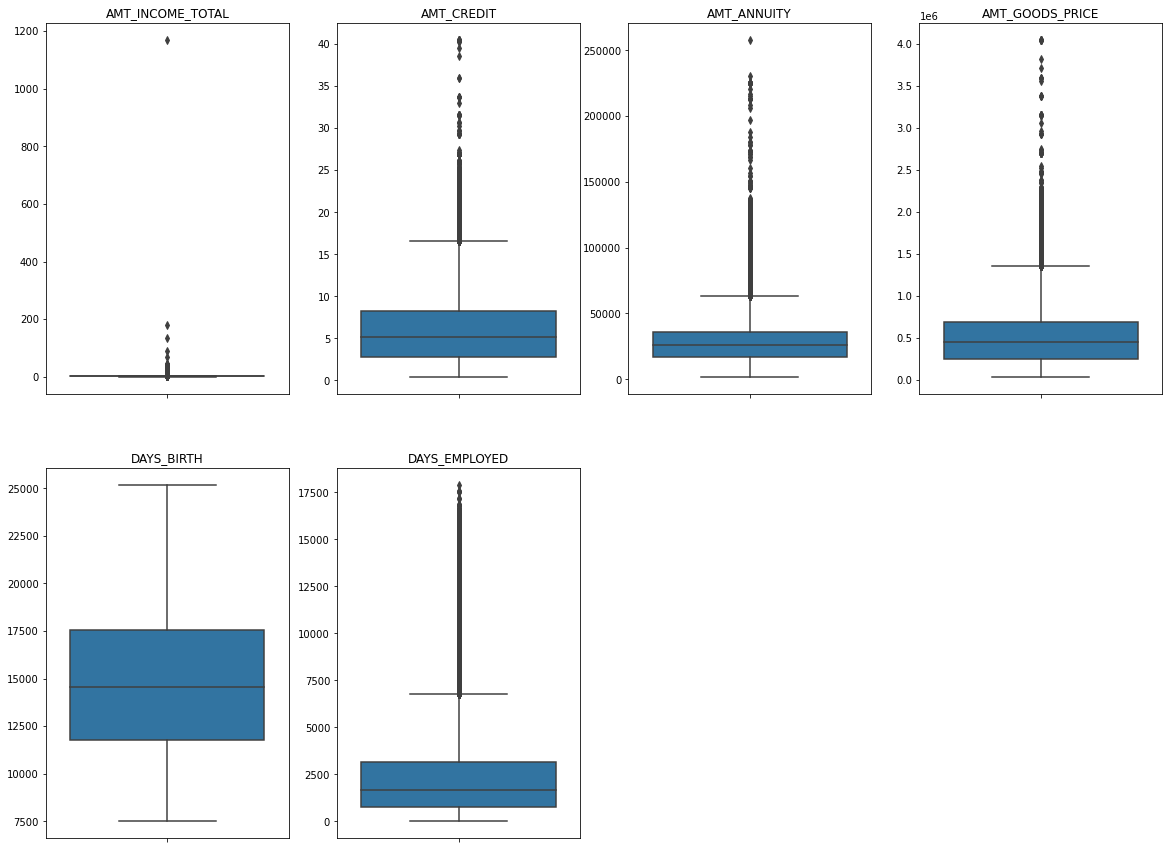

In [101]:
fig = plt.figure(figsize=(20,15))
for i in enumerate(app_data_outlierscheck):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

* AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE,DAYS_EMPLOYED, have some number of outliers.
* AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have higher income when compared to the others.

In [102]:
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0-500
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,0-500
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,0-500
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,500-1000
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,500-1000


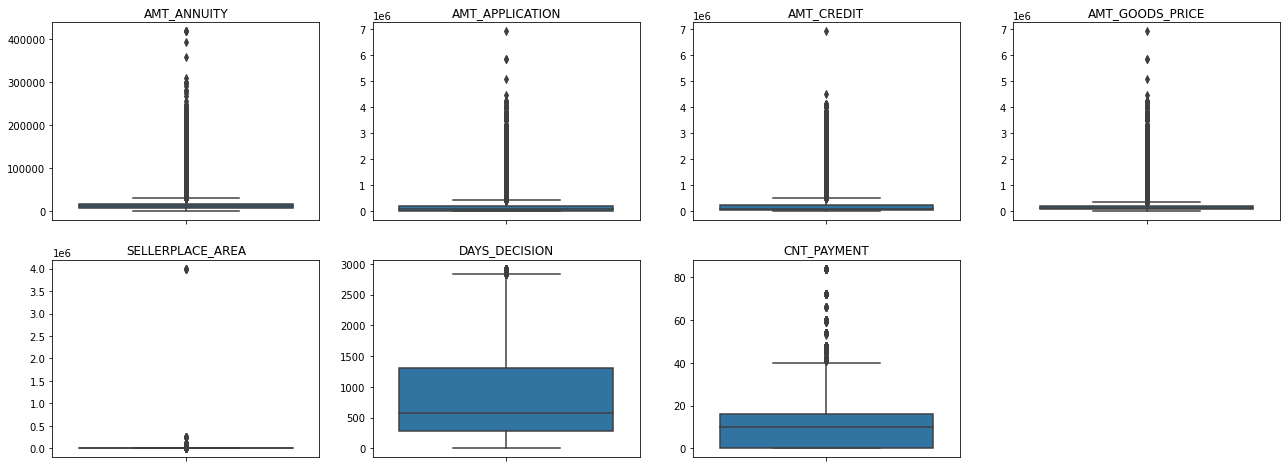

In [103]:
plt.figure(figsize=(22,8))

preapp_data_outlierscheck = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

for i in enumerate(preapp_data_outlierscheck):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=preapp_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

* AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have higher number of outliers.
* CNT_PAYMENT has few outlier values.
* DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

## Checking data imbalance

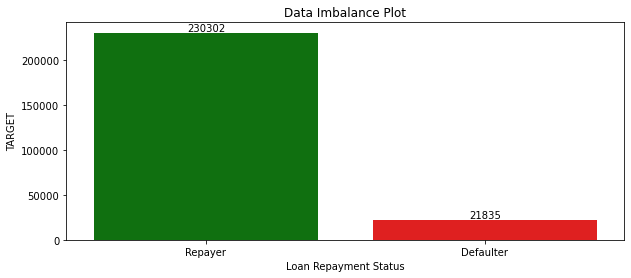

In [104]:
imb = app_data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
ax = sns.barplot(x,"TARGET",data = imb,palette= ['g','r'])
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Loan Repayment Status")
plt.title("Data Imbalance Plot")
plt.show()

In [105]:
#Lets calculate percentage of Repayer and Defaulter
Repayer = round(100.0*imb.iloc[0]['TARGET']/(imb.iloc[0]['TARGET']+imb.iloc[1]['TARGET']),2)
Repayer

91.34

In [106]:
Defaulter = round(100.0*imb.iloc[1]['TARGET']/(imb.iloc[0]['TARGET']+imb.iloc[1]['TARGET']),2)
Defaulter

8.66

In [107]:
#lets calculate ratio of Repayer to Defaulter
round(imb.iloc[0]['TARGET']/imb.iloc[1]['TARGET'],2)

10.55

### We can clearly see the data imbalance here, Repayer data is 91.3% of whole dataset where as Defaulter data is 8.6% of whole dataset.
### The ratio of Repayer to Defaulter is 10.55 : 1 approximately

## Univariate analysis(application data)

#### Categorical unordered univariate analysis 

In [108]:
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,200k-300k,400k-500k,1,0-5
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,0-100K,100K-200K,0,0-5


In [109]:
#calculate the percentage of each NAME_FAMILY_STATUS category. 
app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.650099
Single / not married    0.155931
Civil marriage          0.103900
Separated               0.063458
Widow                   0.026605
Unknown                 0.000008
Name: NAME_FAMILY_STATUS, dtype: float64

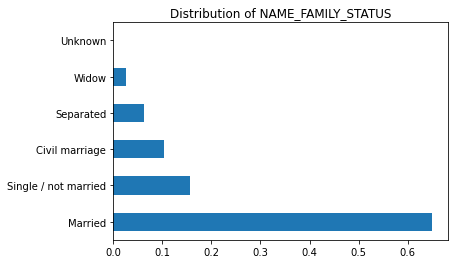

In [217]:
#plot the bar graph of percentage NAME_FAMILY_STATUS categories
app_data['NAME_FAMILY_STATUS'].value_counts(normalize= True).plot.barh()
plt.title("Distribution of NAME_FAMILY_STATUS")
plt.show()

In [111]:
#calculate the percentage of each OCCUPATION_TYPE category. 
app_data['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.218873
Unknown                  0.162685
Sales staff              0.127320
Core staff               0.109345
Managers                 0.084759
Drivers                  0.073781
High skill tech staff    0.045134
Accountants              0.038919
Medicine staff           0.033859
Security staff           0.026656
Cooking staff            0.023582
Cleaning staff           0.018446
Private service staff    0.010518
Low-skill Laborers       0.008301
Waiters/barmen staff     0.005346
Secretaries              0.005176
Realty agents            0.002979
HR staff                 0.002233
IT staff                 0.002086
Name: OCCUPATION_TYPE, dtype: float64

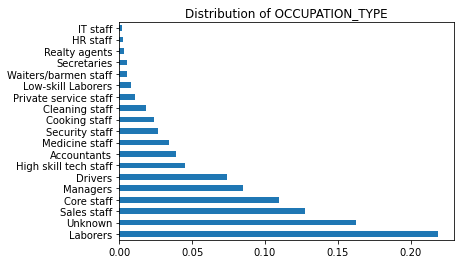

In [220]:
#plot the bar graph of percentage OCCUPATION_TYPE categories
app_data['OCCUPATION_TYPE'].value_counts(normalize= True).plot.barh()
plt.title("Distribution of OCCUPATION_TYPE")
plt.show()

In [113]:
#calculate the percentage of each NAME_INCOME_TYPE category.
app_data['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.629713
Commercial associate    0.284040
State servant           0.086076
Student                 0.000071
Pensioner               0.000040
Businessman             0.000040
Maternity leave         0.000020
Name: NAME_INCOME_TYPE, dtype: float64

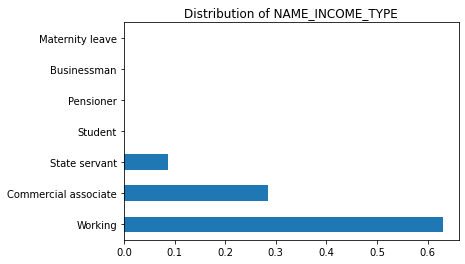

In [222]:
#plot the bar graph of percentage NAME_INCOME_TYPE categories
app_data['NAME_INCOME_TYPE'].value_counts(normalize= True).plot.barh()
plt.title("Distribution of NAME_INCOME_TYPE")
plt.show()


In [115]:
#calculate the percentage of each CODE_GENDER category. 
app_data['CODE_GENDER'].value_counts(normalize=True)

F      0.623379
M      0.376605
XNA    0.000016
Name: CODE_GENDER, dtype: float64

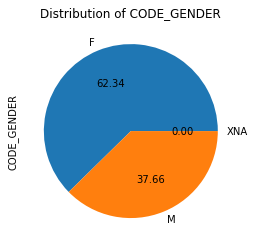

In [223]:
#plot the bar graph of percentage CODE_GENDER categories
app_data['CODE_GENDER'].value_counts(normalize= True).plot.pie(autopct='%.2f')
plt.title("Distribution of CODE_GENDER")
plt.show()

In [117]:
#calculate the percentage of each FLAG_OWN_CAR category. 
app_data['FLAG_OWN_CAR'].value_counts(normalize=True)

N    0.625529
Y    0.374471
Name: FLAG_OWN_CAR, dtype: float64

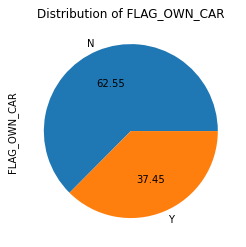

In [224]:
#plot the bar graph of percentage FLAG_OWN_CAR categories
app_data['FLAG_OWN_CAR'].value_counts(normalize= True).plot.pie(autopct='%.2f')
plt.title("Distribution of FLAG_OWN_CAR")
plt.show()

In [119]:
#calculate the percentage of each FLAG_OWN_REALTY category. 
app_data['FLAG_OWN_REALTY'].value_counts(normalize=True)

Y    0.678528
N    0.321472
Name: FLAG_OWN_REALTY, dtype: float64

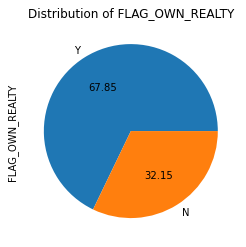

In [225]:
#plot the bar graph of percentage FLAG_OWN_REALTY categories
app_data['FLAG_OWN_REALTY'].value_counts(normalize= True).plot.pie(autopct='%.2f')
plt.title("Distribution of FLAG_OWN_REALTY")
plt.show()

In [121]:
#calculate the percentage of each NAME_HOUSING_TYPE category. 
app_data['NAME_HOUSING_TYPE'].value_counts(normalize=True)

House / apartment      0.874457
With parents           0.057988
Municipal apartment    0.035893
Rented apartment       0.018545
Office apartment       0.009126
Co-op apartment        0.003990
Name: NAME_HOUSING_TYPE, dtype: float64

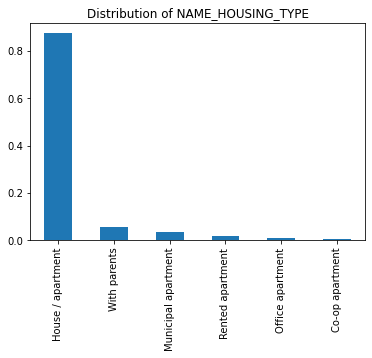

In [226]:
#plot the bar graph of percentage NAME_HOUSING_TYPE categories
app_data['NAME_HOUSING_TYPE'].value_counts(normalize= True).plot.bar()
plt.title("Distribution of NAME_HOUSING_TYPE")
plt.show()

#### Categorical ordered univariate analysis 

In [123]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,200k-300k,400k-500k,1,0-5
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,0-100K,100K-200K,0,0-5
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,1.0,52,50-60,100K-200K,300k-400k,8,5-10
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,50-60,100K-200K,500k-600k,8,5-10


In [124]:
#calculate the percentage of each education category.
app_data["NAME_EDUCATION_TYPE"].value_counts(normalize= True)

Secondary / secondary special    0.687269
Higher education                 0.264416
Incomplete higher                0.038697
Lower secondary                  0.009070
Academic degree                  0.000547
Name: NAME_EDUCATION_TYPE, dtype: float64

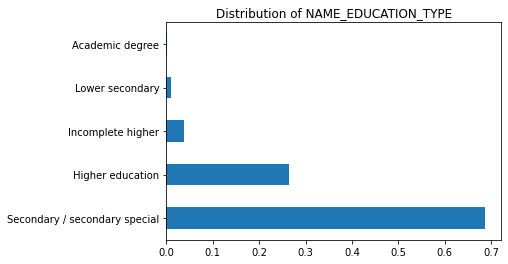

In [227]:
#plot the pie chart of education categories
app_data["NAME_EDUCATION_TYPE"].value_counts(normalize= True).plot.barh()
plt.title("Distribution of NAME_EDUCATION_TYPE")
plt.show()

In [126]:
#calculate the percentage of each AGE_GROUP category.
app_data["AGE_GROUP"].value_counts(normalize= True)

30-40       0.327417
40-50       0.286261
20-30       0.208752
50-60       0.159794
60 above    0.017772
0-20        0.000004
Name: AGE_GROUP, dtype: float64

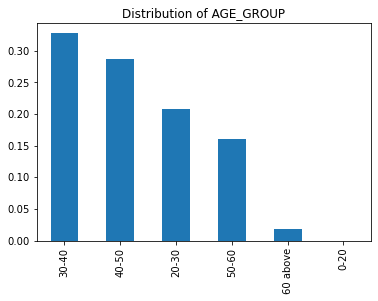

In [228]:
#plot the pie chart of AGE_GROUP categories
app_data["AGE_GROUP"].value_counts(normalize= True).plot.bar()
plt.title("Distribution of AGE_GROUP")
plt.show()

In [128]:
#calculate the percentage of each AMT_INCOME_RANGE category.
app_data["AMT_INCOME_RANGE"].value_counts(normalize= True)

100K-200K    0.515483
200k-300k    0.229089
0-100K       0.173356
300k-400k    0.053343
400k-500k    0.019515
500k-600k    0.004069
600k-700k    0.003239
800k-900k    0.001131
700k-800k    0.000595
900k-1M      0.000107
1M Above     0.000071
Name: AMT_INCOME_RANGE, dtype: float64

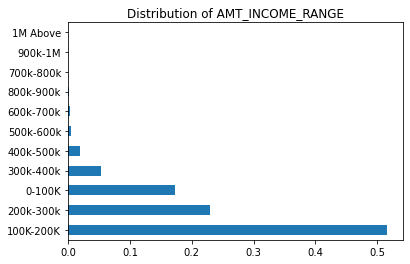

In [229]:
#plot the pie chart of AMT_INCOME_RANGE categories
app_data["AMT_INCOME_RANGE"].value_counts(normalize= True).plot.barh()
plt.title("Distribution of AMT_INCOME_RANGE")
plt.show()

In [130]:
#calculate the percentage of each AMT_CREDIT_RANGE category.
app_data["AMT_CREDIT_RANGE"].value_counts(normalize= True)

1M Above     0.171105
200k-300k    0.168412
500k-600k    0.110745
400k-500k    0.107513
100K-200K    0.095587
300k-400k    0.086802
600k-700k    0.078184
800k-900k    0.073527
700k-800k    0.061153
900k-1M      0.030043
0-100K       0.016927
Name: AMT_CREDIT_RANGE, dtype: float64

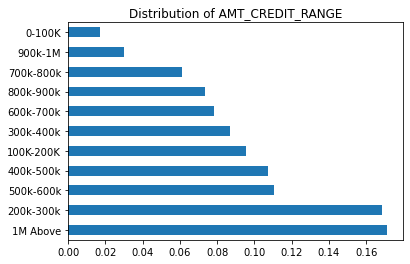

In [230]:
#plot the pie chart of AMT_CREDIT_RANGE categories
app_data["AMT_CREDIT_RANGE"].value_counts(normalize= True).plot.barh()
plt.title("Distribution of AMT_CREDIT_RANGE")
plt.show()

In [132]:
#calculate the percentage of each EMPLOYMENT_YEAR category.
app_data["EMPLOYMENT_YEAR"].value_counts(normalize= True)


0-5         0.604981
5-10        0.222034
10-20       0.129525
20-30       0.033351
30-40       0.009416
40-50       0.000694
50-60       0.000000
60 above    0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

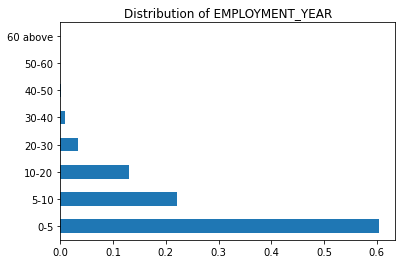

In [231]:
#plot the pie chart of EMPLOYMENT_YEAR categories
app_data["EMPLOYMENT_YEAR"].value_counts(normalize= True).plot.barh()
plt.title("Distribution of EMPLOYMENT_YEAR")
plt.show()

In [134]:
#calculate the percentage of each CNT_CHILDREN category.
app_data["CNT_CHILDREN"].value_counts()


0     161911
1      59698
2      26365
3       3629
4        414
5         81
6         19
7          7
8          2
9          2
12         2
10         2
19         2
14         2
11         1
Name: CNT_CHILDREN, dtype: int64

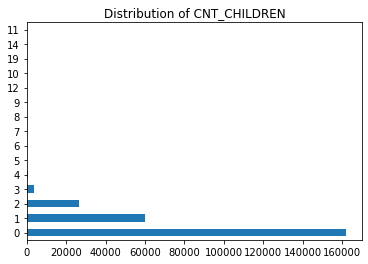

In [232]:
#plot the pie chart of CNT_CHILDREN categories
app_data["CNT_CHILDREN"].value_counts().plot.barh()
plt.title("Distribution of CNT_CHILDREN")
plt.show()

## Bivariate and Multivariate Analysis(application data)

### Numeric- numeric analysis 

In [136]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,200k-300k,400k-500k,1,0-5
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,0-100K,100K-200K,0,0-5
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,1.0,52,50-60,100K-200K,300k-400k,8,5-10
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,50-60,100K-200K,500k-600k,8,5-10


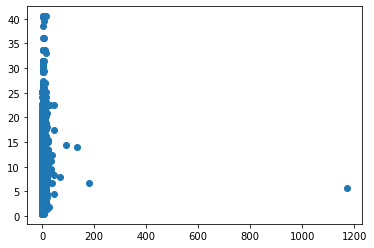

In [137]:
#plot the scatter plot of AMT_INCOME_TOTAL and AMT_CREDIT variable 
plt.scatter(app_data["AMT_INCOME_TOTAL"], app_data["AMT_CREDIT"])

plt.show()

In [138]:
app_data["AMT_INCOME_TOTAL"].describe()

count    252137.000000
mean          1.759141
std           2.588516
min           0.256500
25%           1.125000
50%           1.575000
75%           2.115000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

* From the above we observed that most of the income range values comes under 5M and can see same in above description where 75th percentile lies below 300k. So we have filter the data to below 5M to get the better visualization.

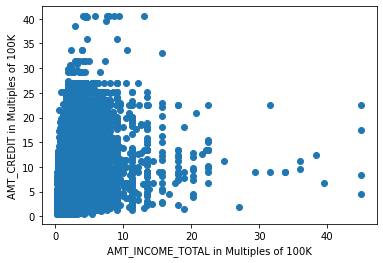

In [139]:
plt.scatter(app_data[app_data["AMT_INCOME_TOTAL"]<=50]["AMT_INCOME_TOTAL"],app_data[app_data["AMT_INCOME_TOTAL"]<=50]["AMT_CREDIT"] )
plt.xlabel('AMT_INCOME_TOTAL in Multiples of 100K')
plt.ylabel('AMT_CREDIT in Multiples of 100K')
plt.show()

We can see that the desity in the graph, where most of the people with below 1M income have credit amount of upto 4M

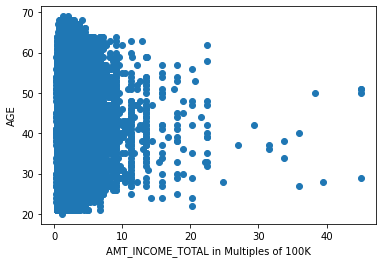

In [140]:
#plot the scatter plot of AMT_INCOME_TOTAL and AGE variable 
plt.scatter(app_data[app_data["AMT_INCOME_TOTAL"]<=50]["AMT_INCOME_TOTAL"],app_data[app_data["AMT_INCOME_TOTAL"]<=50]["AGE"] )
plt.xlabel('AMT_INCOME_TOTAL in Multiples of 100K')
plt.ylabel('AGE')
plt.show()

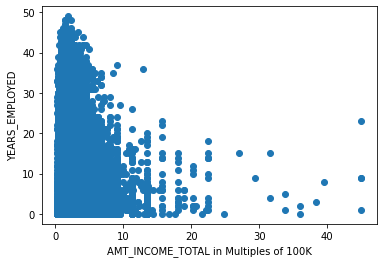

In [141]:
#plot the scatter plot of AMT_INCOME_TOTAL and YEARS_EMPLOYED variable 
plt.scatter(app_data[app_data["AMT_INCOME_TOTAL"]<=50]["AMT_INCOME_TOTAL"],app_data[app_data["AMT_INCOME_TOTAL"]<=50]["YEARS_EMPLOYED"] )
plt.xlabel('AMT_INCOME_TOTAL in Multiples of 100K')
plt.ylabel('YEARS_EMPLOYED')
plt.show()

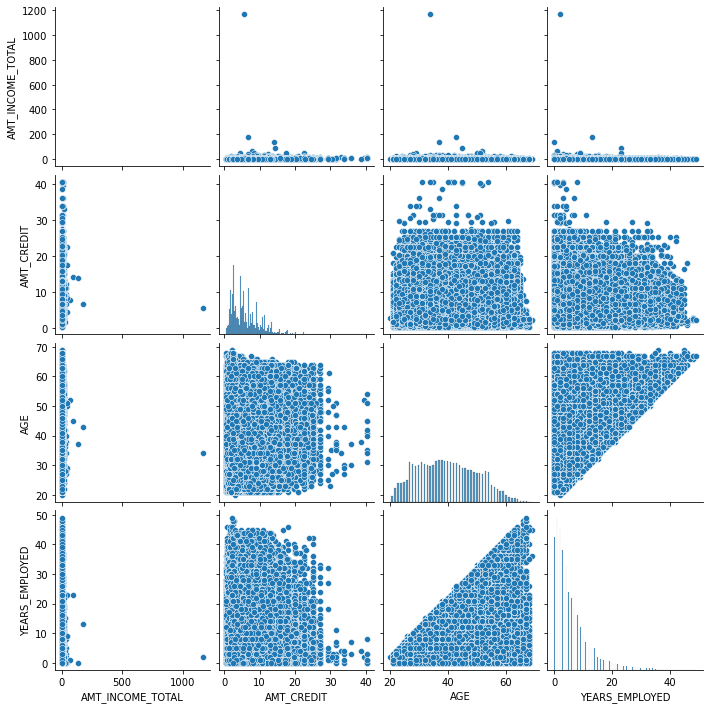

In [142]:
#plot the pairplot of AMT_INCOME_TOTAL, AMT_CREDIT, YEARS_EMPLOYED and age .
sns.pairplot(data=app_data, vars=["AMT_INCOME_TOTAL","AMT_CREDIT", "AGE","YEARS_EMPLOYED"])
plt.show()

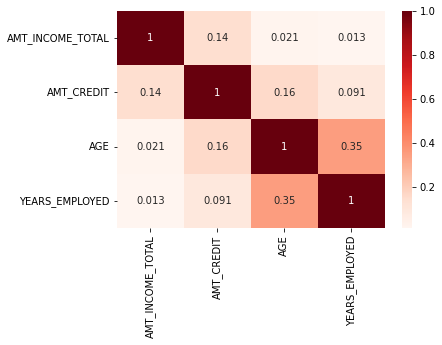

In [143]:
#plot the correlation matrix of AMT_INCOME_TOTAL, AMT_CREDIT, YEARS_EMPLOYED and age .
sns.heatmap( app_data[["AMT_INCOME_TOTAL","AMT_CREDIT", "AGE","YEARS_EMPLOYED"]].corr(), annot= True, cmap= "Reds")
plt.show()

### Numerical categorical variable

###### TARGET vs AMT_INCOME_TOTAL

In [144]:
#groupby the response to find the mean of the salary with TARGET.
app_data.groupby("TARGET")["AMT_INCOME_TOTAL"].mean()

TARGET
0    1.764984
1    1.697506
Name: AMT_INCOME_TOTAL, dtype: float64

In [145]:
app_data.groupby("TARGET")["AMT_INCOME_TOTAL"].median()

TARGET
0    1.575
1    1.440
Name: AMT_INCOME_TOTAL, dtype: float64

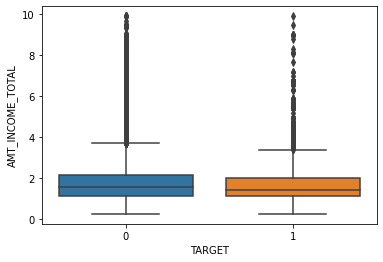

In [146]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=app_data[app_data['AMT_INCOME_TOTAL']<=10],x="TARGET", y="AMT_INCOME_TOTAL")
plt.show()

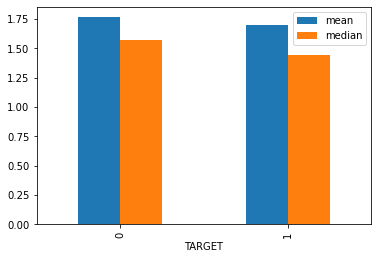

In [146]:
app_data.groupby("TARGET")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.bar()
plt.show()

In [147]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [148]:
#calculate 75th percentile of AMT_INCOME_TOTAL with TARGET
app_data.groupby("TARGET")["AMT_INCOME_TOTAL"].aggregate([p75])

,p75
TARGET,
0,2.160
1,2.025


##### TARGET vs AMT_CREDIT

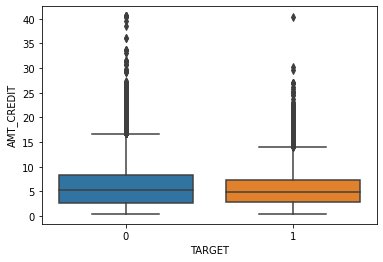

In [149]:
sns.boxplot(data=app_data,x="TARGET", y="AMT_CREDIT")
plt.show()

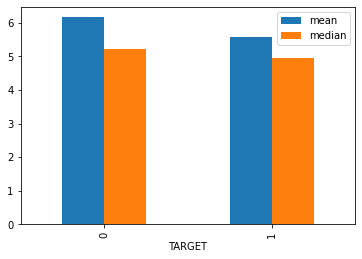

In [150]:
app_data.groupby("TARGET")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()
plt.show()

#### NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL 

In [151]:
#groupby the education to find the mean of the AMT_INCOME_TOTAL education category.
app_data.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean()

NAME_EDUCATION_TYPE
Academic degree                  2.468087
Higher education                 2.132222
Incomplete higher                1.832760
Lower secondary                  1.458650
Secondary / secondary special    1.614860
Name: AMT_INCOME_TOTAL, dtype: float64

In [152]:
#groupby the education to find the median of the AMT_INCOME_TOTAL education category.
app_data.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].median()

NAME_EDUCATION_TYPE
Academic degree                  2.250
Higher education                 1.800
Incomplete higher                1.575
Lower secondary                  1.350
Secondary / secondary special    1.350
Name: AMT_INCOME_TOTAL, dtype: float64

#### OCCUPATION_TYPE vs AMT_INCOME_TOTAL

In [153]:
#groupby the job to find the mean of the AMT_INCOME_TOTAL for each OCCUPATION_TYPE category.
app_data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean()

OCCUPATION_TYPE
Accountants              1.945784
Cleaning staff           1.307978
Cooking staff            1.383965
Core staff               1.726567
Drivers                  1.870116
HR staff                 1.889163
High skill tech staff    1.828420
IT staff                 2.134656
Laborers                 1.663575
Low-skill Laborers       1.332280
Managers                 2.603367
Medicine staff           1.497096
Private service staff    1.823348
Realty agents            1.950040
Sales staff              1.523029
Secretaries              1.605417
Security staff           1.496627
Unknown                  1.766260
Waiters/barmen staff     1.442726
Name: AMT_INCOME_TOTAL, dtype: float64

In [154]:
app_data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].median()

OCCUPATION_TYPE
Accountants              1.7865
Cleaning staff           1.1250
Cooking staff            1.2600
Core staff               1.5750
Drivers                  1.8000
HR staff                 1.5840
High skill tech staff    1.5750
IT staff                 1.8000
Laborers                 1.5750
Low-skill Laborers       1.2150
Managers                 2.2500
Medicine staff           1.3500
Private service staff    1.5750
Realty agents            1.8000
Sales staff              1.3500
Secretaries              1.3500
Security staff           1.3500
Unknown                  1.5750
Waiters/barmen staff     1.3500
Name: AMT_INCOME_TOTAL, dtype: float64

#### CNT_FAM_MEMBERS vs AMT_INCOME_TOTAL

In [155]:
app_data.groupby("CNT_FAM_MEMBERS")["AMT_INCOME_TOTAL"].mean()

CNT_FAM_MEMBERS
1.0     1.733881
2.0     1.772790
3.0     1.766011
4.0     1.729521
5.0     1.746052
6.0     1.690023
7.0     1.770900
8.0     1.488553
9.0     1.410000
10.0    1.320000
11.0    2.700000
12.0    0.675000
13.0    3.150000
14.0    2.812500
15.0    2.250000
16.0    0.540000
20.0    1.125000
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

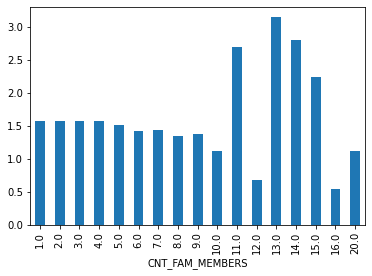

In [156]:
app_data.groupby("CNT_FAM_MEMBERS")["AMT_INCOME_TOTAL"].median().plot.bar()

### Categorical categorical variable 

#### TARGET vs NAME_EDUCATION_TYPE

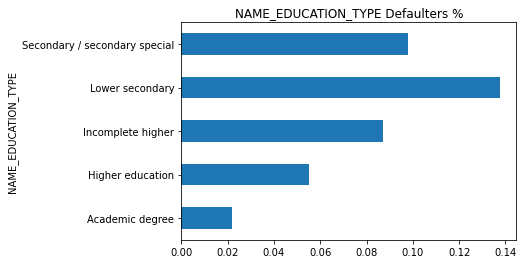

In [234]:
#plot the bar graph of TARGET with different NAME_EDUCATION_TYPE categories.
app_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.barh()
plt.title("NAME_EDUCATION_TYPE Defaulters %")
plt.show()

#### TARGET vs NAME_FAMILY_STATUS

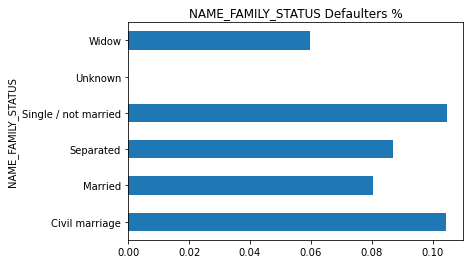

In [219]:
#plot the bar graph of TARGET with different NAME_FAMILY_STATUS categories.
app_data.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.barh()
plt.title("NAME_FAMILY_STATUS Defaulters %")
plt.show()

#### TARGET vs OCCUPATION_TYPE

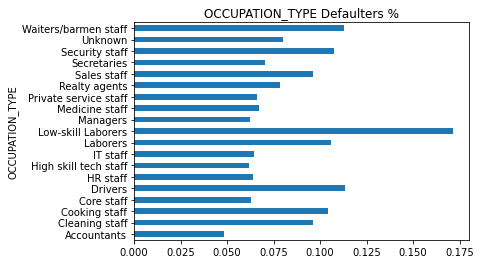

In [221]:
#plot the bar graph of TARGET with different NAME_FAMILY_STATUS categories.
app_data.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.barh()
plt.title("OCCUPATION_TYPE Defaulters %")
plt.show()

#### TARGET vs AGE

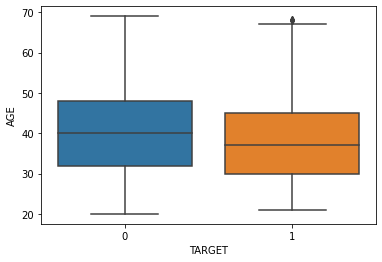

In [160]:
#plot the boxplot of age with TARGET
sns.boxplot(data=app_data, x="TARGET",y="AGE")
plt.show()

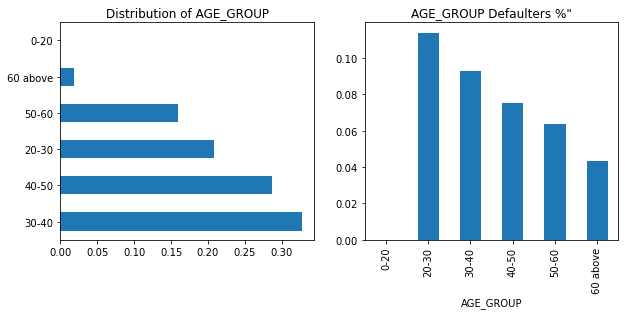

In [237]:
#plot the percentage of each AGE_GROUP buckets and average values of TARGET in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["AGE_GROUP"].value_counts(normalize= True).plot.barh()
plt.title('Distribution of AGE_GROUP')
plt.subplot(1, 2, 2)
app_data.groupby(['AGE_GROUP'])['TARGET'].mean().plot.bar()
plt.title('AGE_GROUP Defaulters %')
plt.show()

#### TARGET vs AMT_INCOME_RANGE

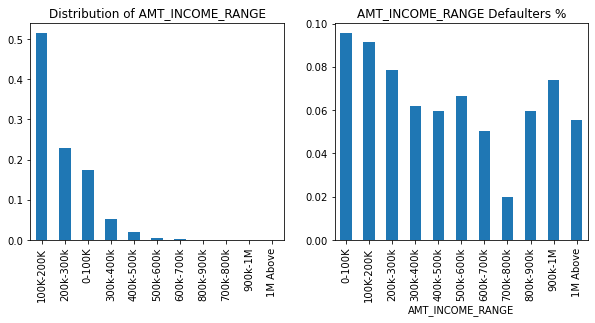

In [238]:
#plot the percentage of each AMT_INCOME_RANGE buckets and average values of TARGET in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["AMT_INCOME_RANGE"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of AMT_INCOME_RANGE')
plt.subplot(1, 2, 2)
app_data.groupby(['AMT_INCOME_RANGE'])['TARGET'].mean().plot.bar()
plt.title('AMT_INCOME_RANGE Defaulters %')
plt.show()

#### TARGET vs AMT_CREDIT_RANGE

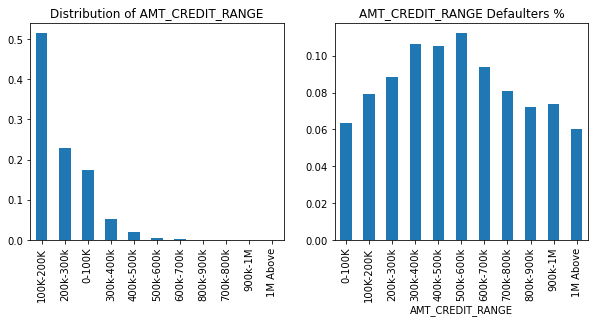

In [239]:
#plot the percentage of each AMT_CREDIT_RANGE buckets and average values of TARGET in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["AMT_INCOME_RANGE"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of AMT_CREDIT_RANGE')
plt.subplot(1, 2, 2)
app_data.groupby(['AMT_CREDIT_RANGE'])['TARGET'].mean().plot.bar()
plt.title('AMT_CREDIT_RANGE Defaulters %')
plt.show()

#### TARGET vs EMPLOYMENT_YEAR

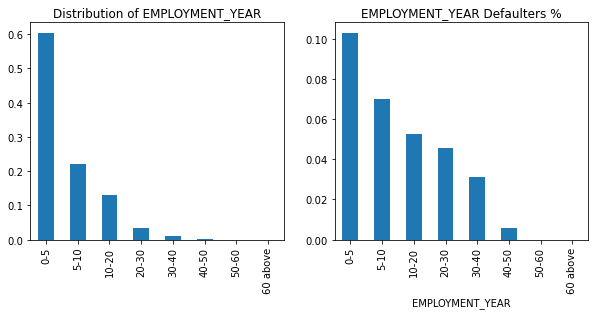

In [240]:
#plot the percentage of each EMPLOYMENT_YEAR buckets and average values of TARGET in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["EMPLOYMENT_YEAR"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of EMPLOYMENT_YEAR')
plt.subplot(1, 2, 2)
app_data.groupby(['EMPLOYMENT_YEAR'])['TARGET'].mean().plot.bar()
plt.title('EMPLOYMENT_YEAR Defaulters %')
plt.show()

#### TARGET vs ORGANIZATION_TYPE

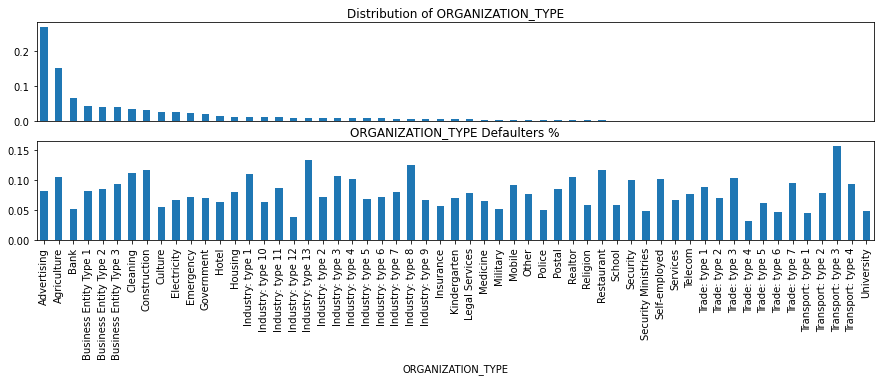

In [241]:
#plot the percentage of each ORGANIZATION_TYPE and average values of TARGET. plot in subplots.
plt.figure(figsize=[15,4])
plt.subplot(2, 1, 1)
app_data["ORGANIZATION_TYPE"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of ORGANIZATION_TYPE')
plt.xticks([])
plt.subplot(2, 1, 2)
app_data.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().plot.bar()
plt.title('ORGANIZATION_TYPE Defaulters %')
plt.show()

#### TARGET vs NAME_CONTRACT_TYPE

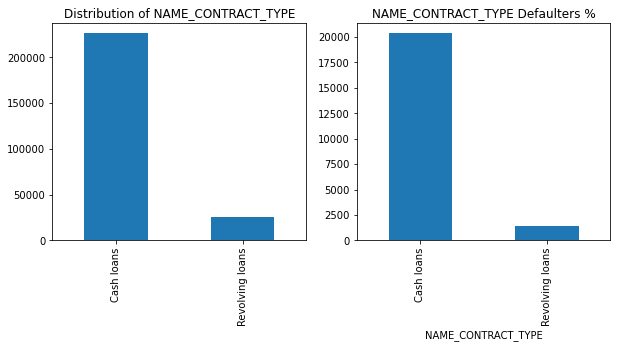

In [242]:
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["NAME_CONTRACT_TYPE"].value_counts().plot.bar()
plt.title('Distribution of NAME_CONTRACT_TYPE')
plt.subplot(1, 2, 2)
app_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].sum().plot.bar(label=True)
plt.title('NAME_CONTRACT_TYPE Defaulters %')
plt.show()

#### TARGET vs CODE_GENDER

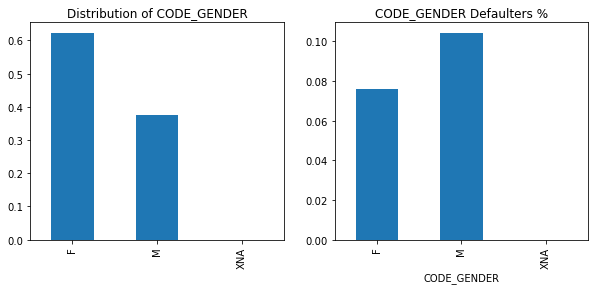

In [245]:
#plot the percentage of each CODE_GENDER and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["CODE_GENDER"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of CODE_GENDER')
plt.subplot(1, 2, 2)
app_data.groupby(['CODE_GENDER'])['TARGET'].mean().plot.bar()
plt.title('CODE_GENDER Defaulters %')
plt.show()

#### TARGET vs FLAG_OWN_CAR

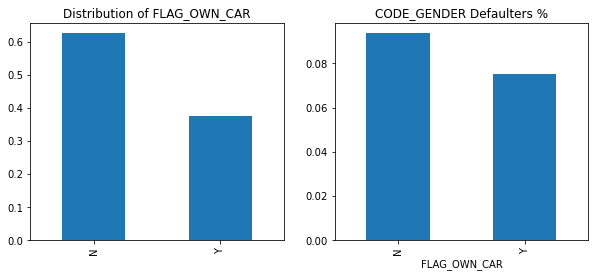

In [246]:
#plot the percentage of each FLAG_OWN_CAR and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["FLAG_OWN_CAR"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of FLAG_OWN_CAR')
plt.subplot(1, 2, 2)
app_data.groupby(['FLAG_OWN_CAR'])['TARGET'].mean().plot.bar()
plt.title('CODE_GENDER Defaulters %')
plt.show()

#### TARGET vs FLAG_OWN_REALTY

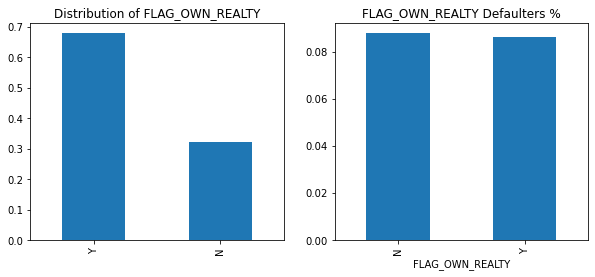

In [248]:
#plot the percentage of each FLAG_OWN_REALTY and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["FLAG_OWN_REALTY"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of FLAG_OWN_REALTY')
plt.subplot(1, 2, 2)
app_data.groupby(['FLAG_OWN_REALTY'])['TARGET'].mean().plot.bar()
plt.title('FLAG_OWN_REALTY Defaulters %')
plt.show()

#### TARGET vs NAME_INCOME_TYPE

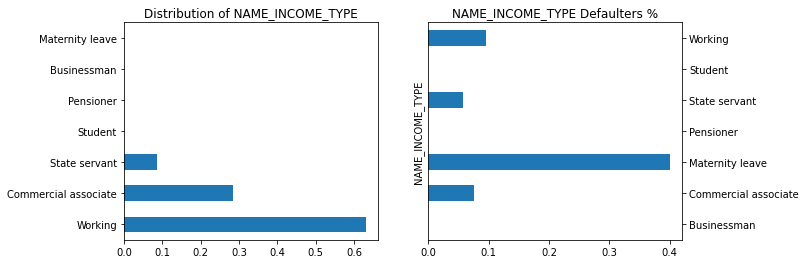

In [255]:
#plot the percentage of each NAME_INCOME_TYPE and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["NAME_INCOME_TYPE"].value_counts(normalize= True).plot.barh()
plt.title('Distribution of NAME_INCOME_TYPE')
ax = plt.subplot(1, 2, 2)
app_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
ax.yaxis.tick_right()
plt.title('NAME_INCOME_TYPE Defaulters %')
plt.show()

#### TARGET vs CNT_CHILDREN

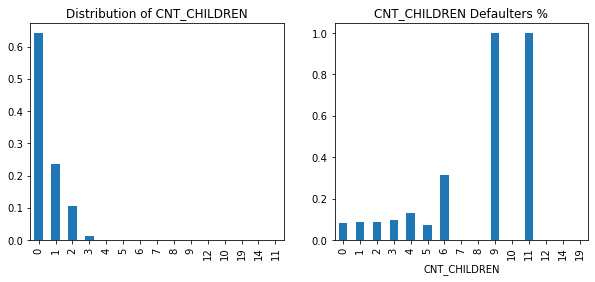

In [256]:
#plot the percentage of each CNT_CHILDREN and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["CNT_CHILDREN"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of CNT_CHILDREN')
plt.subplot(1, 2, 2)
app_data.groupby(['CNT_CHILDREN'])['TARGET'].mean().plot.bar()
plt.title('CNT_CHILDREN Defaulters %')
plt.show()

#### TARGET vs NAME_TYPE_SUITE

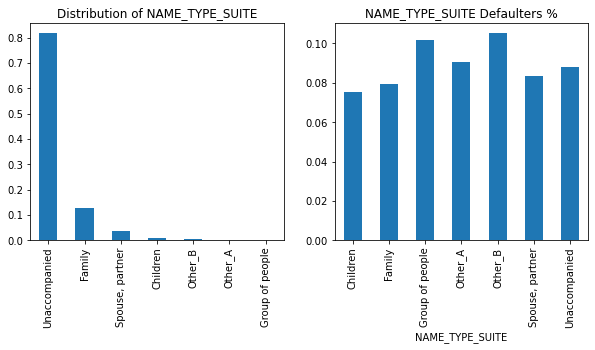

In [261]:
#plot the percentage of each NAME_TYPE_SUITE and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["NAME_TYPE_SUITE"].value_counts(normalize= True).plot.bar()
plt.title('Distribution of NAME_TYPE_SUITE')
plt.subplot(1, 2, 2)
app_data.groupby(['NAME_TYPE_SUITE'])['TARGET'].mean().plot.bar()

plt.title('NAME_TYPE_SUITE Defaulters %')
plt.show()

#### TARGET vs NAME_HOUSING_TYPE

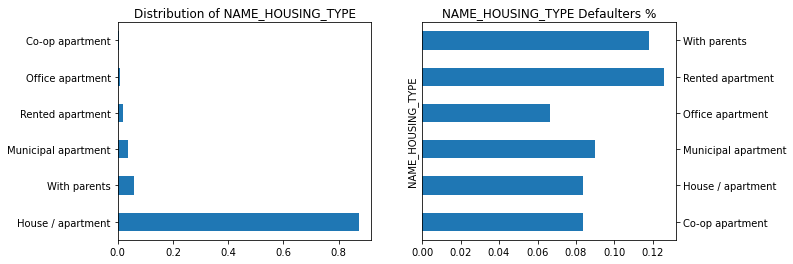

In [262]:
#plot the percentage of each NAME_HOUSING_TYPE and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["NAME_HOUSING_TYPE"].value_counts(normalize= True).plot.barh()
plt.title('Distribution of NAME_HOUSING_TYPE')
ax=plt.subplot(1, 2, 2)
app_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].mean().plot.barh()
ax.yaxis.tick_right()
plt.title('NAME_HOUSING_TYPE Defaulters %')
plt.show()

#### TARGET vs FLAG_DOCUMENT_3

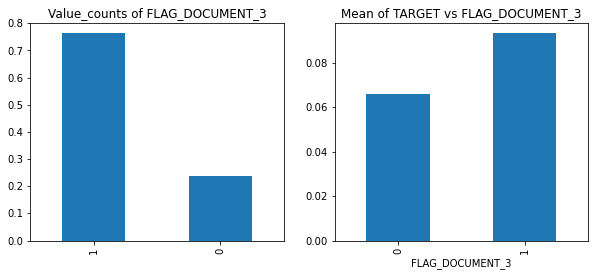

In [174]:
#plot the percentage of each FLAG_DOCUMENT_3 and average values of TARGET. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
app_data["FLAG_DOCUMENT_3"].value_counts(normalize= True).plot.bar()
plt.title('Value_counts of FLAG_DOCUMENT_3')
plt.subplot(1, 2, 2)
app_data.groupby(['FLAG_DOCUMENT_3'])['TARGET'].mean().plot.bar()
plt.title('Mean of TARGET vs FLAG_DOCUMENT_3')
plt.show()

## Multivariate Analysis(application data)

#### NAME_INCOME_TYPE vs AMT_INCOME_TOTAL

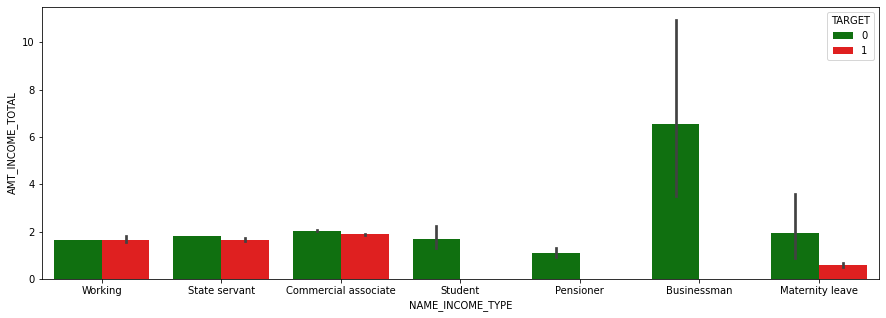

In [175]:
plt.figure(figsize=[15,5])
sns.barplot(x="NAME_INCOME_TYPE",y="AMT_INCOME_TOTAL",data=app_data,hue="TARGET",palette =['g','r'])
plt.show()

#### Amount variables

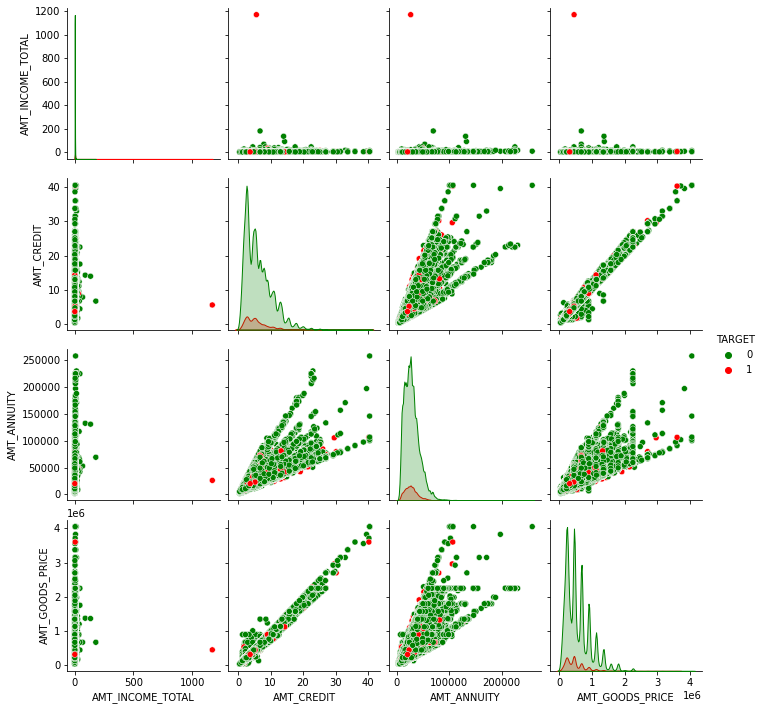

In [192]:
#Plotting pairplot between amount variable
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
sns.pairplot(amount,hue='TARGET',palette=["g","r"])
plt.show()

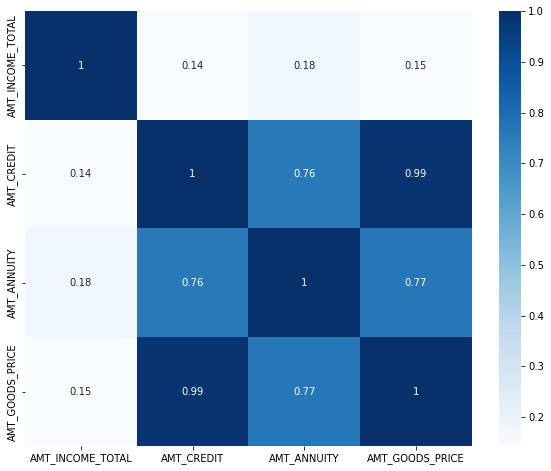

In [265]:
#Correlation between amount variables
plt.figure(figsize=[10,8])
sns.heatmap(app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap ="Blues")
plt.show()

In [267]:
# Dividing the application_data dataframe based on Target value 0 and 1 for correlation and other analysis
cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer = app_data.loc[app_data['TARGET']==0, cols] # Repayers
Defaulter = app_data.loc[app_data['TARGET']==1, cols] # Defaulters

In [179]:
# Getting the top 10 correlation for the Repayers data
c_repayer = Repayer.corr()
c_repayer = c_repayer.where(np.triu(np.ones(c_repayer.shape),k=1).astype(np.bool))
c_df_repayer = c_repayer.unstack().reset_index()
c_df_repayer.columns =['VAR1','VAR2','Correlation']
c_df_repayer.dropna(subset = ["Correlation"], inplace = True)
c_df_repayer["Correlation"]=c_df_repayer["Correlation"].abs() 
c_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
c_df_repayer.head(10)

,VAR1,VAR2,Correlation
118,AMT_GOODS_PRICE,AMT_CREDIT,0.986726
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949504
290,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893276
449,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860421
539,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.820828
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.766945
89,AMT_ANNUITY,AMT_CREDIT,0.762117
324,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.543381
353,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.540836
419,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.461596


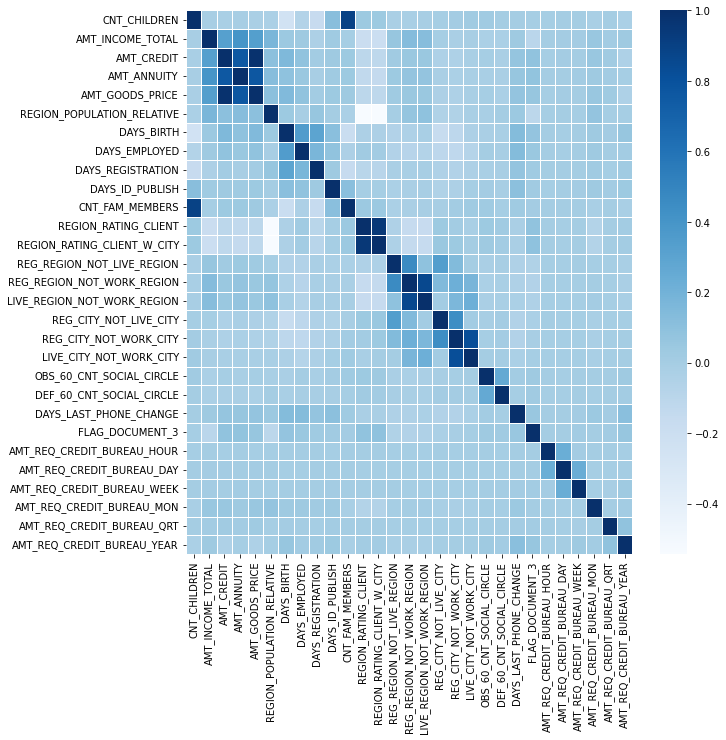

In [269]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(Repayer.corr(), cmap="Blues",annot=False,linewidth =1)

In [181]:
# Getting the top 10 correlation for the Defaulter data
c_Defaulter = Defaulter.corr()
c_Defaulter = c_Defaulter.where(np.triu(np.ones(c_Defaulter.shape),k=1).astype(np.bool))
c_df_Defaulter = c_Defaulter.unstack().reset_index()
c_df_Defaulter.columns =['VAR1','VAR2','Correlation']
c_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
c_df_Defaulter["Correlation"]=c_df_Defaulter["Correlation"].abs()
c_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
c_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
118,AMT_GOODS_PRICE,AMT_CREDIT,0.982799
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956531
290,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893829
449,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.846872
539,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.768247
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.749379
89,AMT_ANNUITY,AMT_CREDIT,0.748708
419,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.506747
509,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.478266
353,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.447083


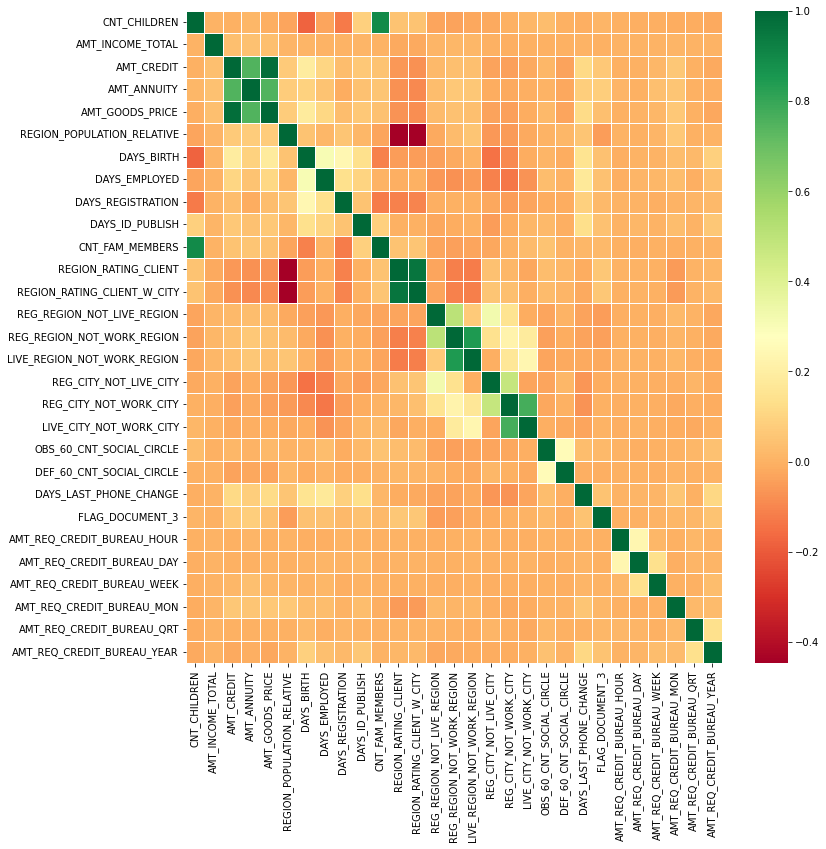

In [182]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter.corr(), cmap="RdYlGn",annot=False,linewidth =1)

## Univariate & Bivariate Analysis(previous application data)

In [183]:
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0-500
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,0-500
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,0-500
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,500-1000
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,500-1000


In [184]:
preapp_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [185]:
preapp_data['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-500        45.106316
500-1000     22.352046
1000-1500    11.480924
1500-2000     7.652373
2000-2500     7.394082
2500-3000     6.014259
Name: DAYS_DECISION_GROUP, dtype: float64

In [193]:
preapp_data['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

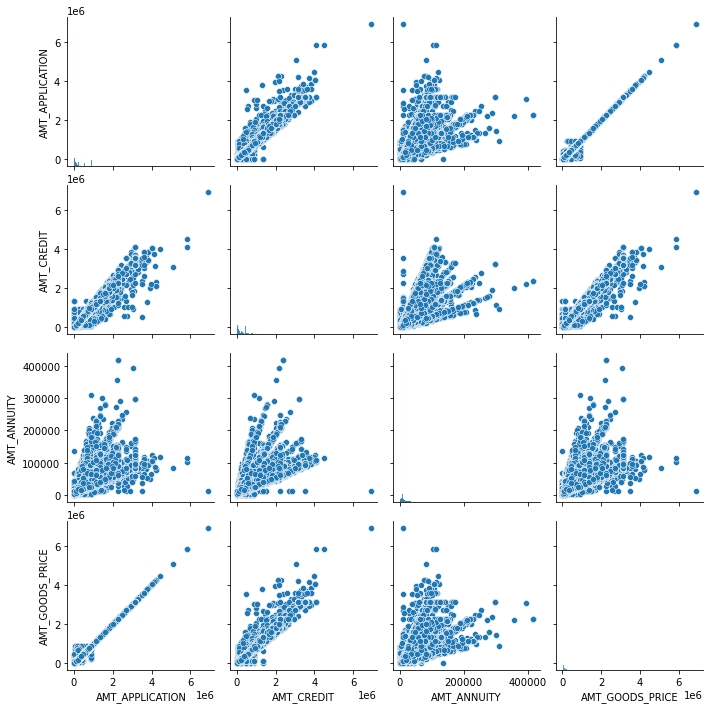

In [164]:
#Plotting pairplot between amount variable
amount1 = preapp_data[[ 'AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']]
sns.pairplot(amount1)
plt.show()

# Merged Dataframes Analysis

In [149]:
#combine both the dataframe on SK_ID_CURR with Inner Joins
combined_df = pd.merge(app_data, preapp_data, how='inner', on='SK_ID_CURR')
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,200k-300k,400k-500k,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,500-1000
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,500-1000
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,500-1000
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200k-300k,1M Above,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2500
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,0-100K,100K-200K,0,0-5,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,500-1000


In [150]:
combined_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140025e+06,1.139032e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.137549e+06,1.137549e+06,1.137549e+06,1.137549e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06
mean,2.784378e+05,9.326666e-02,4.923754e-01,1.798601e+00,5.988711e+00,2.776085e+04,5.376794e+05,2.074396e-02,1.498252e+04,2.456019e+03,4.638679e+03,2.828750e+03,2.260768e+00,2.053276e+00,2.030749e+00,1.371700e-02,5.451716e-02,4.469800e-02,8.552185e-02,2.754548e-01,2.158277e-01,1.541616e+00,1.505096e-01,1.523563e+00,1.054504e-01,1.089511e+03,7.950949e-01,5.659063e-03,6.143224e-03,3.417190e-02,2.821489e-01,3.111713e-01,2.601458e+00,4.054735e+01,6.233826e+00,1.922484e+06,1.488368e+04,1.737888e+05,1.956659e+05,1.986897e+05,8.858701e+02,3.237863e+02,1.221298e+01
std,1.028304e+05,2.908059e-01,7.629301e-01,2.174405e+00,3.857198e+00,1.402090e+04,3.540473e+05,1.332284e-02,3.634048e+03,2.314548e+03,3.274842e+03,1.516788e+03,9.328707e-01,4.992291e-01,4.925183e-01,1.163136e-01,2.270354e-01,2.066401e-01,2.796568e-01,4.467434e-01,4.113955e-01,2.527046e+00,4.599711e-01,2.504867e+00,3.732542e-01,8.019666e+02,4.036324e-01,7.836470e-02,1.038458e-01,1.998376e-01,9.557681e-01,9.087038e-01,2.095504e+00,9.956094e+00,6.350317e+00,5.326710e+05,1.343060e+04,2.967152e+05,3.229700e+05,2.856289e+05,7.834204e+02,6.682626e+03,1.421208e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.980000e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.892802e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.842560e+00,1.746900e+04,2.475000e+05,1.003200e-02,1.201300e+04,8.450000e+02,1.829000e+03,1.528000e+03,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.020000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.200000e+01,2.000000e+00,1.461178e+06,7.214524e+03,2.065500e+04,2.578050e+04,6.295500e+04,2.760000e+02,-1.000000e+00,0.000000e+00
50%,2.788255e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.212800e+00,2.596050e+04,4.500000e+05,1.885000e-02,1.479700e+04,1.761000e+03,4.257500e+03,2.941000e+03,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.009000e+03,1.000000e

In [155]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
group = combined_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([group.value_counts(),round(group.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
print (df1)

                             Counts  Percentage
NAME_CONTRACT_STATUS TARGET                    
Approved             0       657634       91.86
                     1        58297        8.14
Canceled             0       181483       89.95
                     1        20282       10.05
Refused              0       175597       87.11
                     1        25979       12.89
Unused offer         0        19069       91.48
                     1         1777        8.52


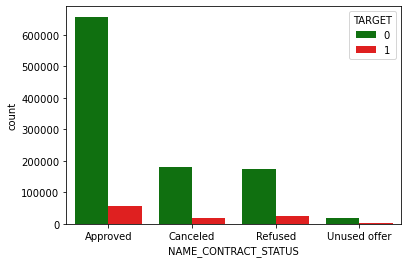

In [163]:
sns.countplot(x="NAME_CONTRACT_STATUS", data=combined_df,hue="TARGET",palette= ['g','r'])
plt.show()

* We can see that applicants who have been perviously resfused have higher percentage of defaulters

In [166]:
# Dividing the merged dataframe based on Target value 0 and 1 for correlation and other analysis

Repayer1 = combined_df[combined_df['TARGET']==0]
Defaulter1 = combined_df[combined_df['TARGET']==1] 

In [193]:
Repayer1.shape

(1033783, 72)

### Contract Status vs purpose of the loan

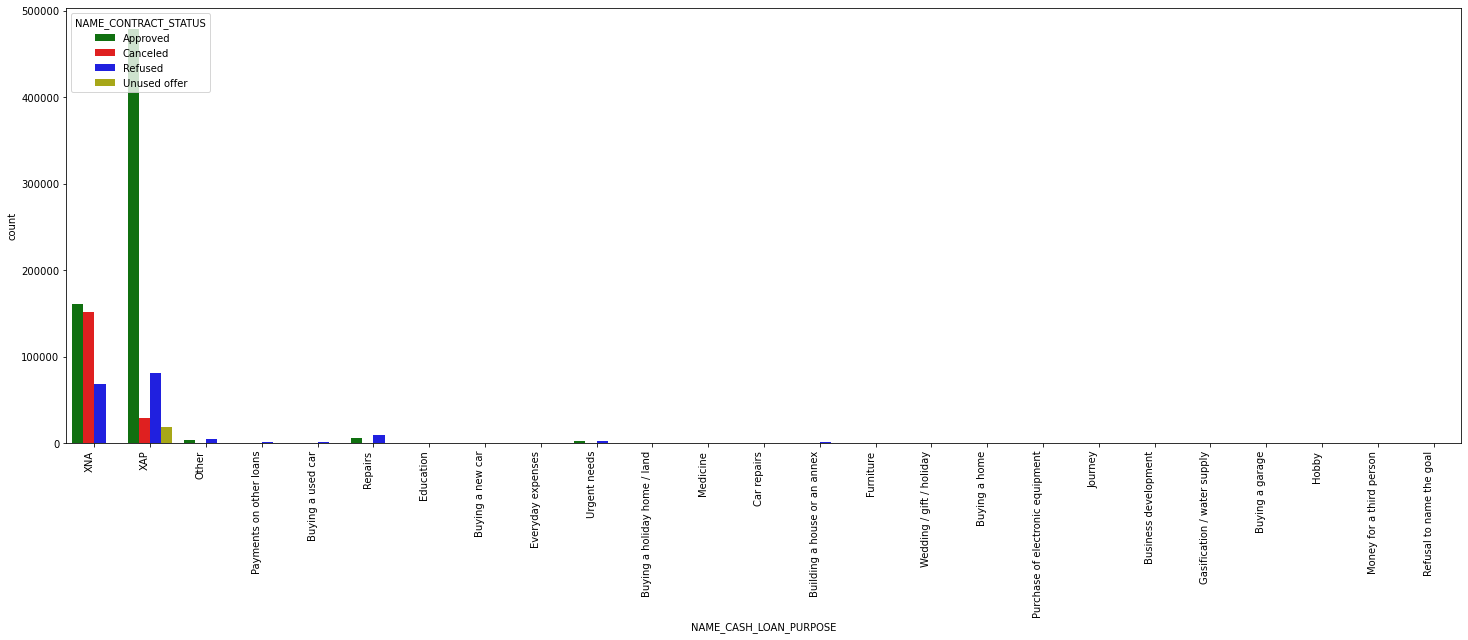

In [184]:
plt.figure(figsize=[25,8])
gfg = sns.countplot(x="NAME_CASH_LOAN_PURPOSE", data=Repayer1,hue="NAME_CONTRACT_STATUS",palette= ['g','r','b','y'])
plt.xticks(rotation=90, ha='right')
plt.show()

#### Most values in NAME_CASH_LOAN_PURPOSE are unknow (XNA,XAP), lets remove them and plot the graph

In [207]:
Repayer2 = Repayer1[-Repayer1["NAME_CASH_LOAN_PURPOSE"].isin(['XNA','XAP'])]
Repayer2.shape

(44414, 72)

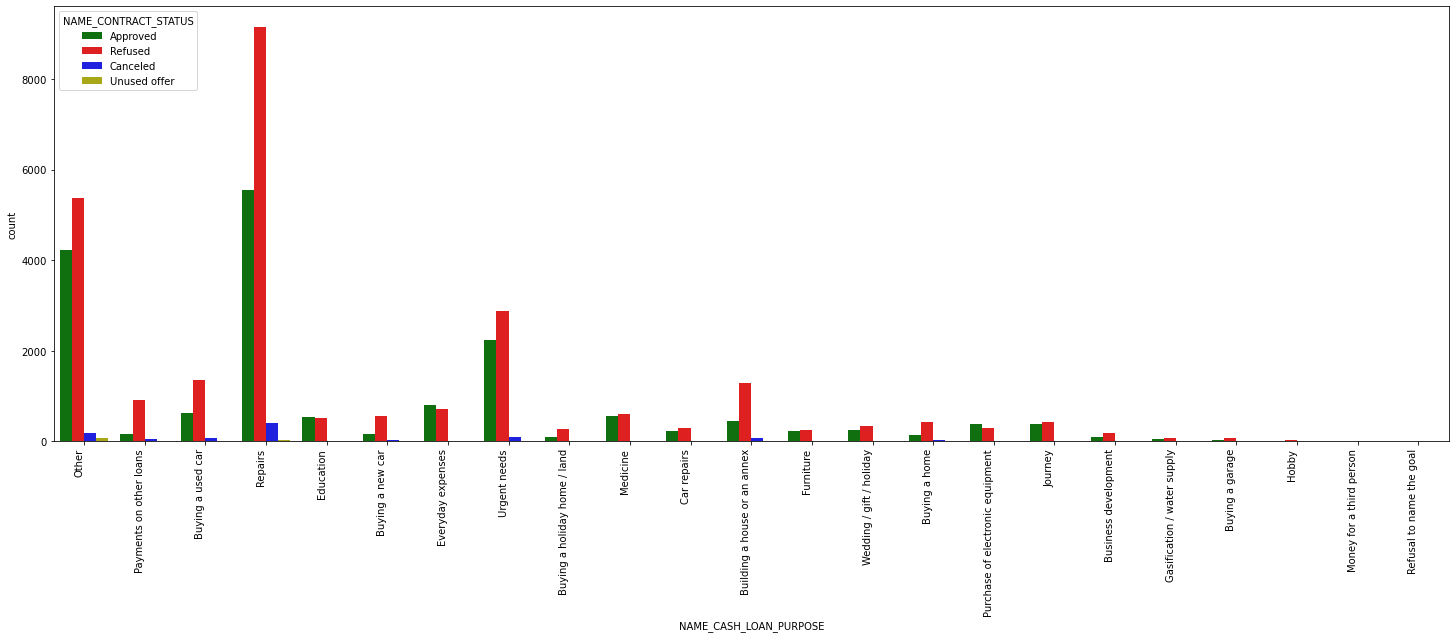

In [206]:

plt.figure(figsize=[25,8])
gfg = sns.countplot(x="NAME_CASH_LOAN_PURPOSE", data=Repayer2,hue="NAME_CONTRACT_STATUS",palette= ['g','r','b','y'])
plt.xticks(rotation=90, ha='right')
plt.show()

In [210]:
Defaulter2 = Defaulter1[-Defaulter1["NAME_CASH_LOAN_PURPOSE"].isin(['XNA','XAP'])]
Defaulter2.shape

(7006, 72)

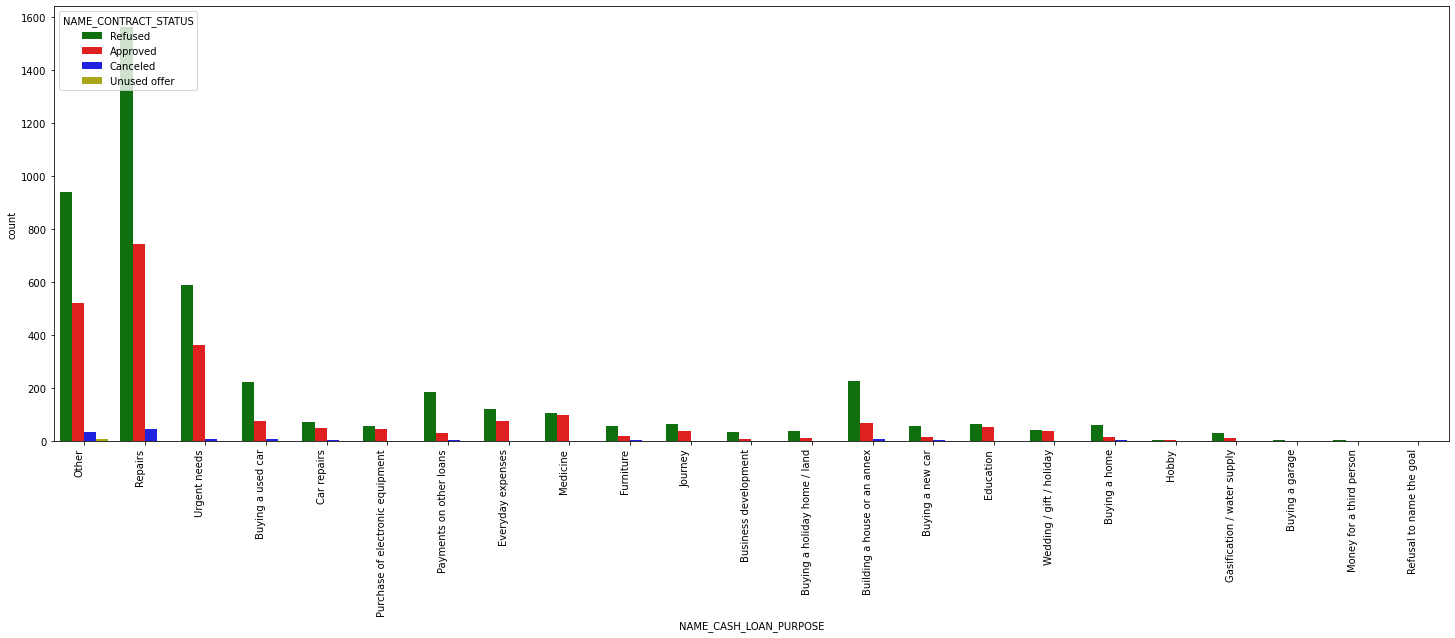

In [211]:
plt.figure(figsize=[25,8])
gfg = sns.countplot(x="NAME_CASH_LOAN_PURPOSE", data=Defaulter2,hue="NAME_CONTRACT_STATUS",palette= ['g','r','b','y'])
plt.xticks(rotation=90, ha='right')
plt.show()

* We can see that Repairs purpose loans have percentage of defaulters.

### NAME_CLIENT_TYPE Vs TARGET

In [216]:
group1 = combined_df.groupby("NAME_CLIENT_TYPE")["TARGET"]
df2 = pd.concat([group1.value_counts(),round(group1.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
print (df2)

                         Counts  Percentage
NAME_CLIENT_TYPE TARGET                    
New              0       194285       90.34
                 1        20768        9.66
Refreshed        0        86891       92.20
                 1         7350        7.80
Repeater         0       751535       90.59
                 1        78079        9.41
XNA              0         1072       88.60
                 1          138       11.40


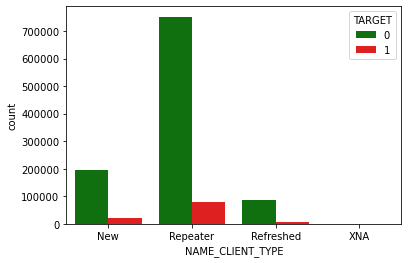

In [215]:
sns.countplot(x="NAME_CLIENT_TYPE", data=combined_df,hue="TARGET",palette= ['g','r'])
plt.show()

* We can see that New clients have higher percentage of defaulters when compared with repayer percentage